# Vitoria Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [5]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
vitoria_lims = pnboia_limits_tests.vitoria

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [8]:
# filter data with

vitoria = filter_data(data=buoys_df_raw,
                    buoy='vitoria',
                    limits=vitoria_lims,
                    outlier_check=False,
                    t_continuity_check=False)

vitoria = vitoria.drop(columns=vitoria.filter(regex='dir|head|spread').columns)

# # Drop all-nans columns
# vitoria.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

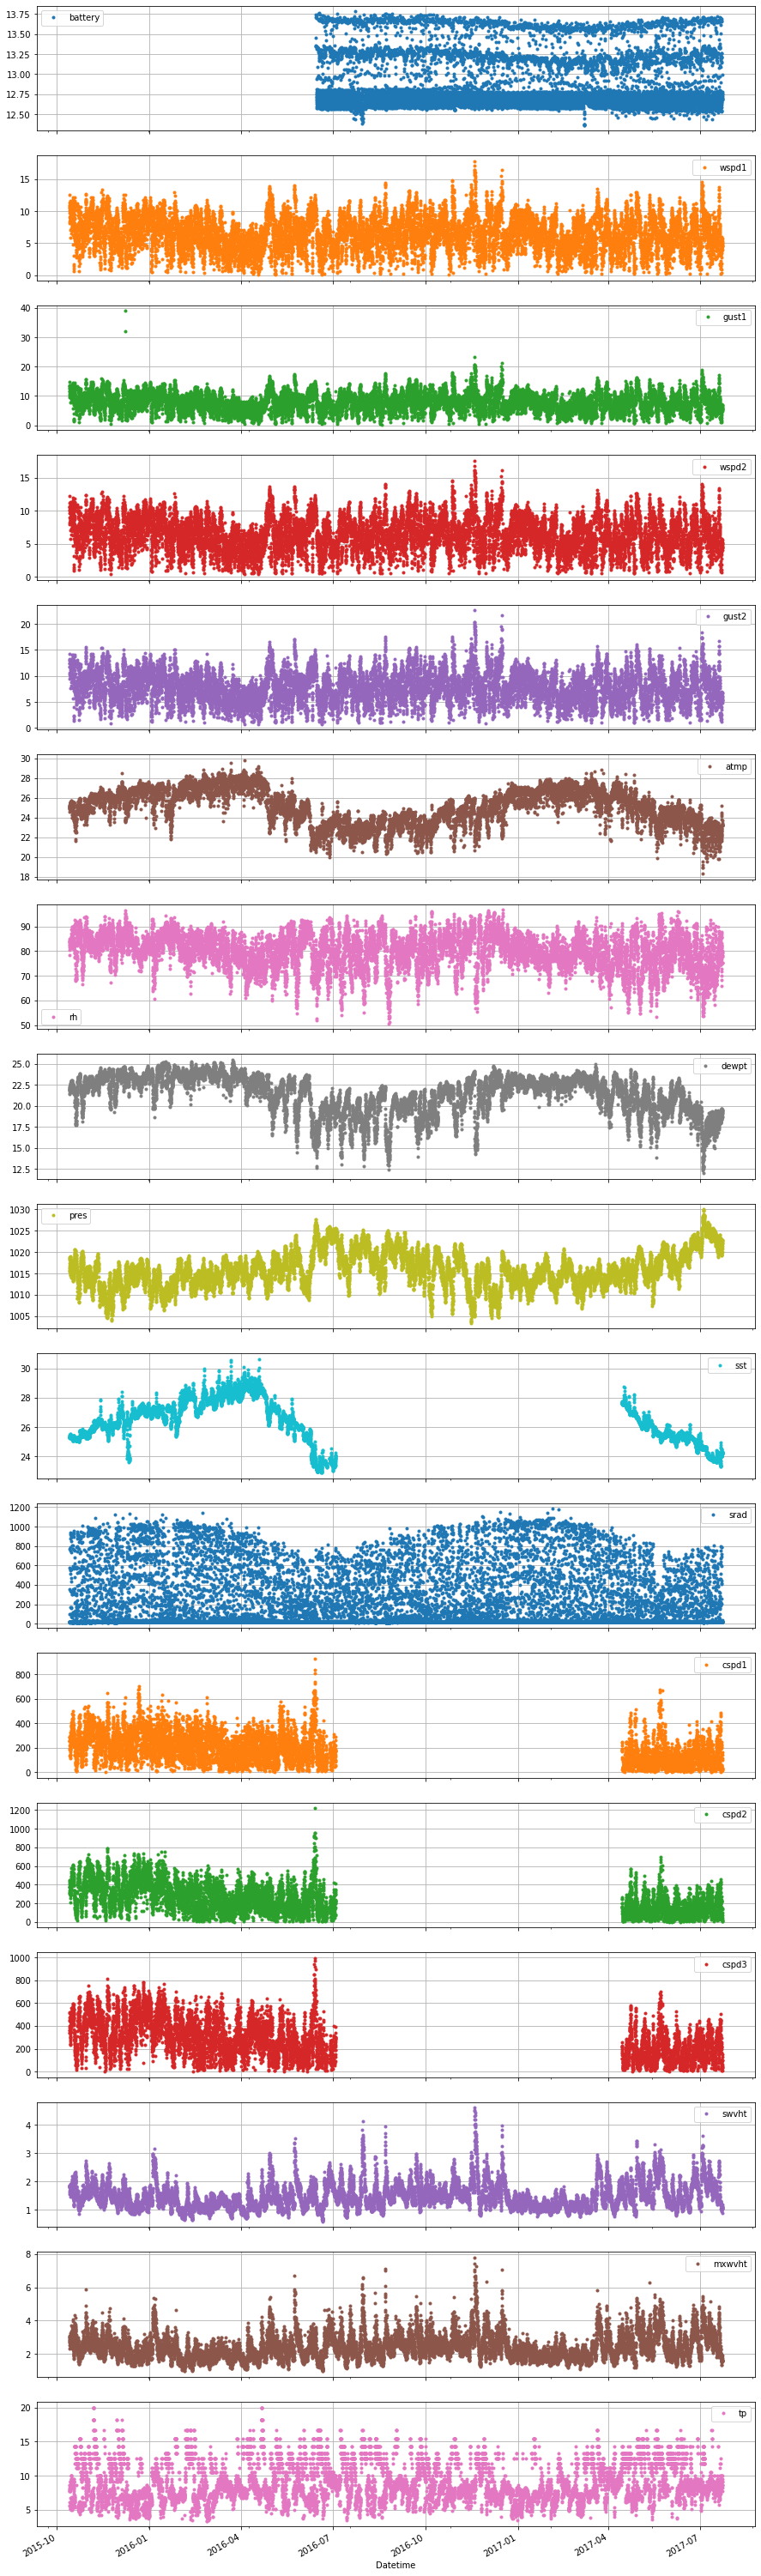

In [9]:
vitoria.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

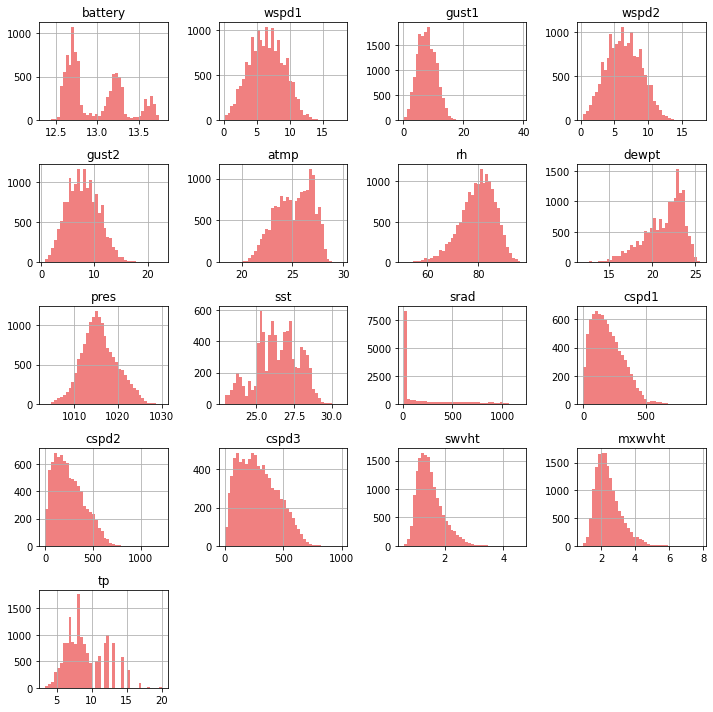

In [10]:
vitoria.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [11]:
# Generated lims
vitoria_out_lims_df_3 = gen_outlier_lim(vitoria, buoy_name='vitoria', std_factor=3).round(1)

# Generate lims dict
vitoria_out_lims_dict_3 = manual_outlier_lims(vitoria_out_lims_df_3, buoy_name='vitoria')

# filter data with
vitoria3 = filter_data(data=vitoria,
                    buoy='vitoria',
                    limits=vitoria_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=vitoria_out_lims_dict_3)

outlier_check done.


In [12]:
# Generated lims
vitoria_out_lims_df_5 = gen_outlier_lim(vitoria, buoy_name='vitoria', std_factor=5).round(1)

# Generate lims dict
vitoria_out_lims_dict_5 = manual_outlier_lims(vitoria_out_lims_df_5, buoy_name='vitoria')

# filter data with
vitoria2 = filter_data(data=vitoria,
                    buoy='vitoria',
                    limits=vitoria_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=vitoria_out_lims_dict_5)

outlier_check done.


In [13]:
vitoria_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,6.5,2.6,3.0,7.9,0.0,14.4
gust1,7.9,3.1,3.0,9.2,0.0,17.2
wspd2,6.4,2.6,3.0,7.7,0.0,14.1
gust2,7.9,3.0,3.0,8.9,0.0,16.7
atmp,25.1,1.8,3.0,5.4,19.7,30.5
rh,79.8,6.8,3.0,20.5,59.2,100.3
dewpt,21.4,2.3,3.0,6.8,14.6,28.2
pres,1015.8,4.0,3.0,12.1,1003.7,1028.0
sst,26.4,1.4,3.0,4.3,22.1,30.6


In [14]:
vitoria_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,6.5,2.6,5.0,13.2,0.0,19.7
gust1,7.9,3.1,5.0,15.4,0.0,23.3
wspd2,6.4,2.6,5.0,12.8,0.0,19.2
gust2,7.9,3.0,5.0,14.8,0.0,22.7
atmp,25.1,1.8,5.0,9.0,16.1,34.2
rh,79.8,6.8,5.0,34.2,45.5,114.0
dewpt,21.4,2.3,5.0,11.3,10.1,32.7
pres,1015.8,4.0,5.0,20.2,995.6,1036.0
sst,26.4,1.4,5.0,7.1,19.3,33.5


# Testing generated limits

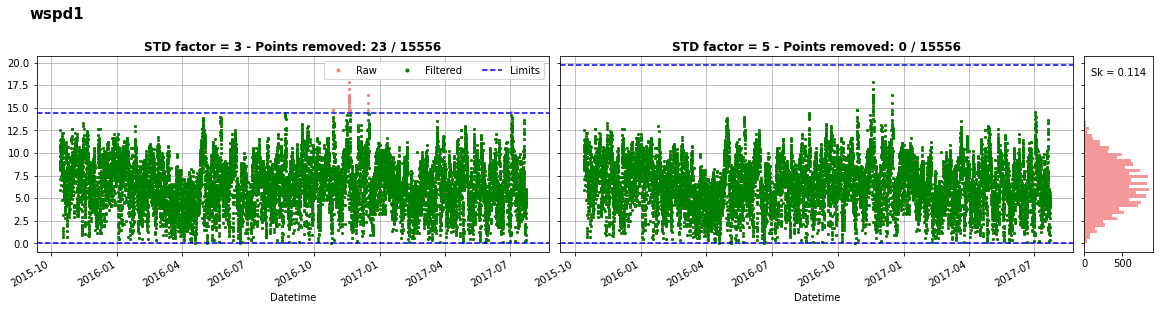

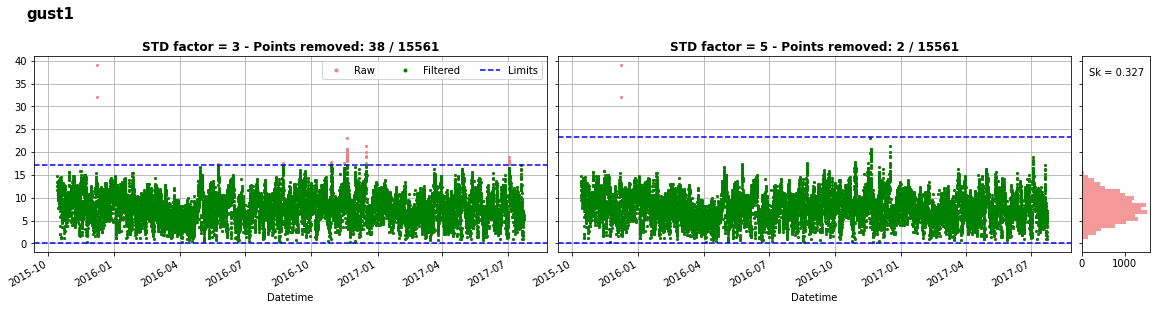

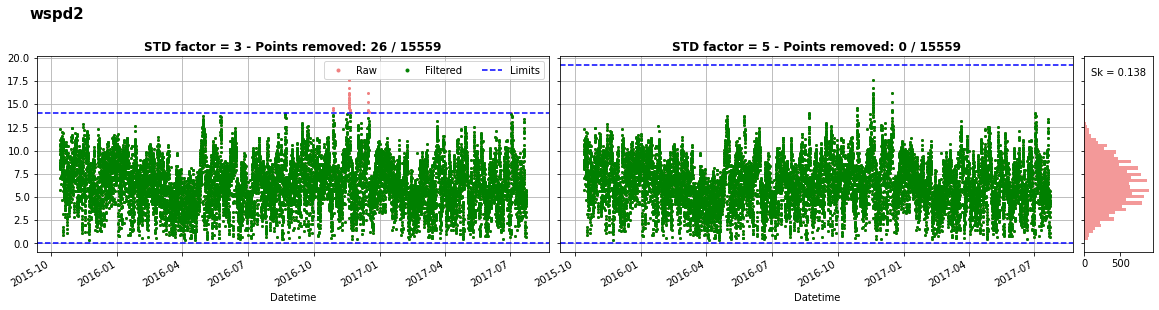

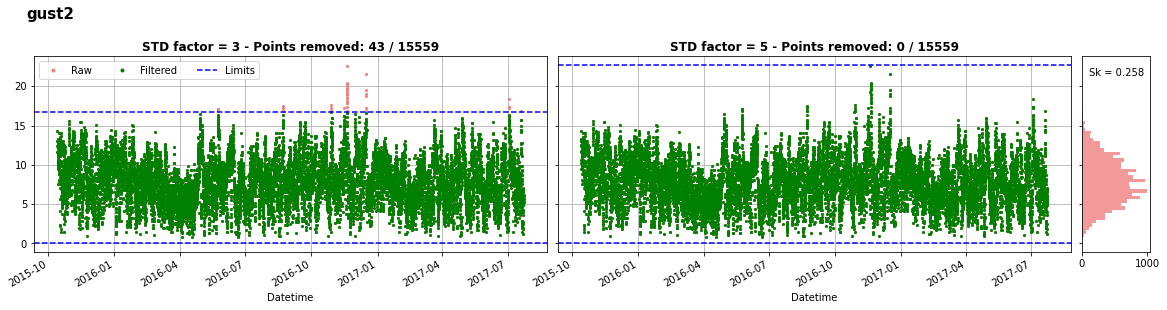

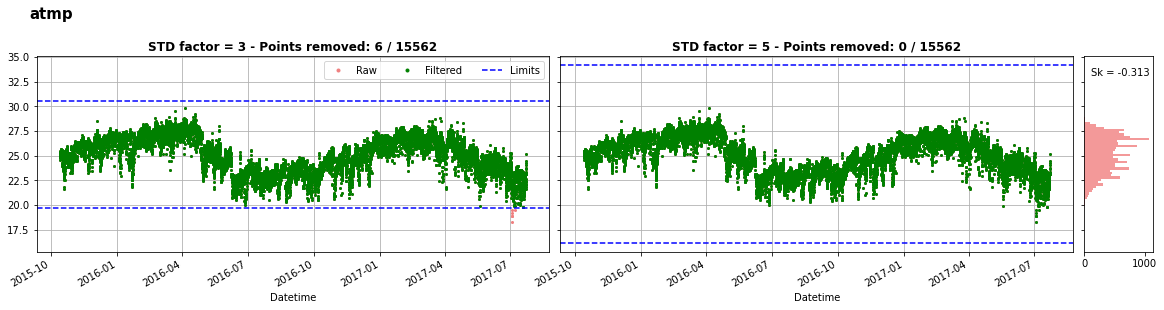

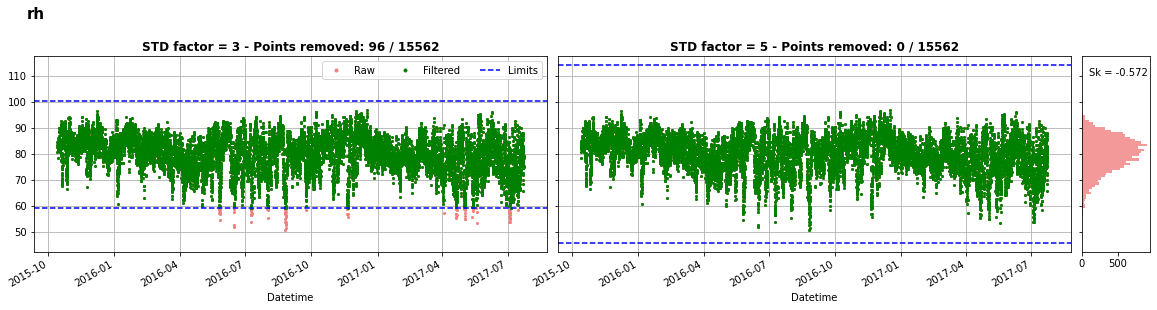

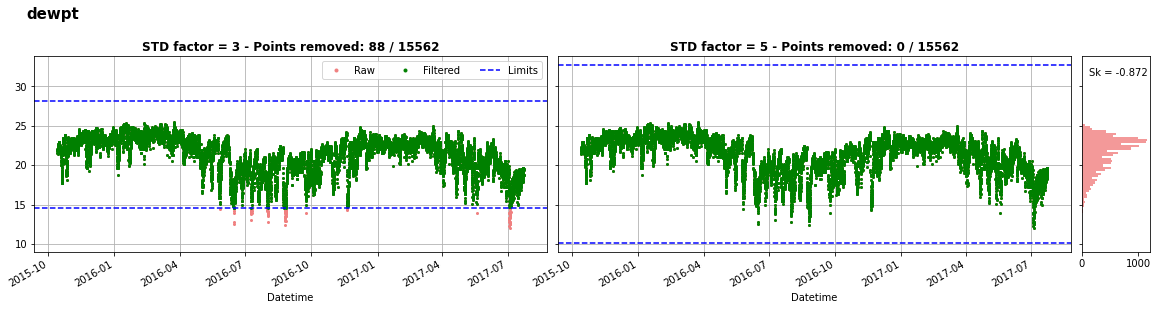

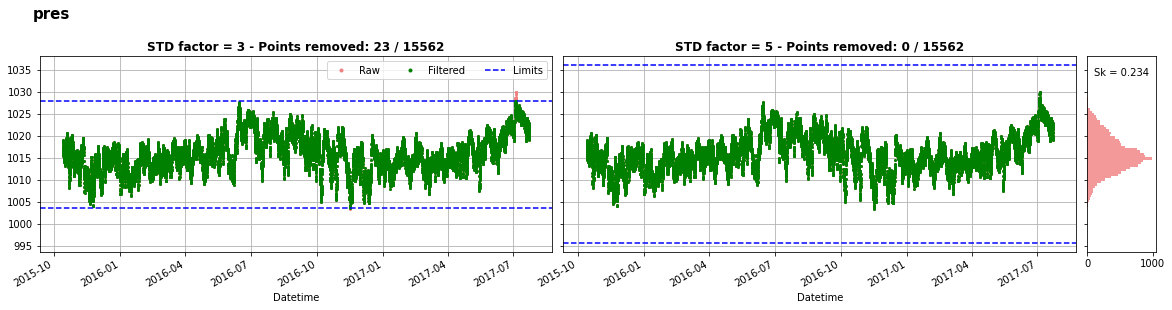

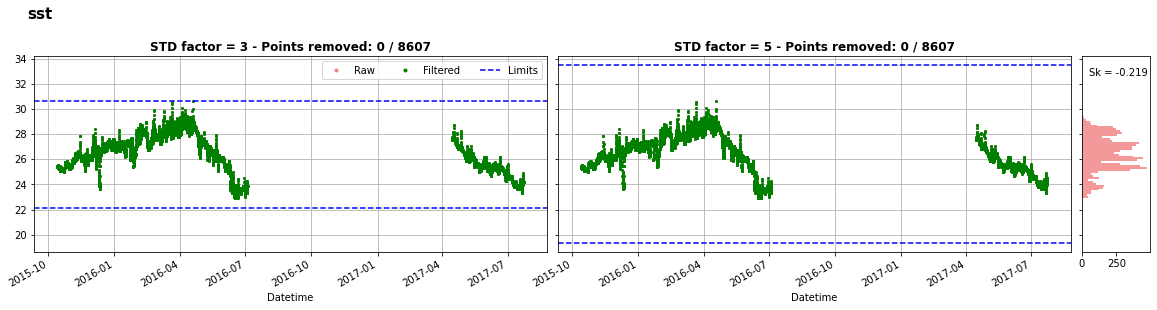

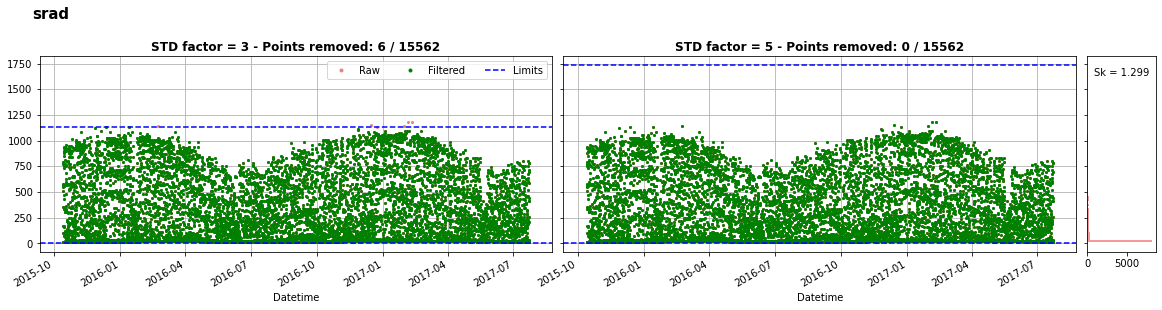

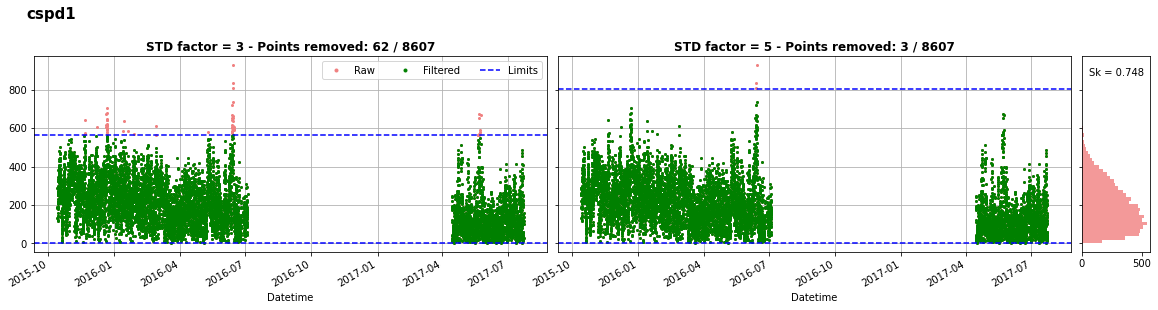

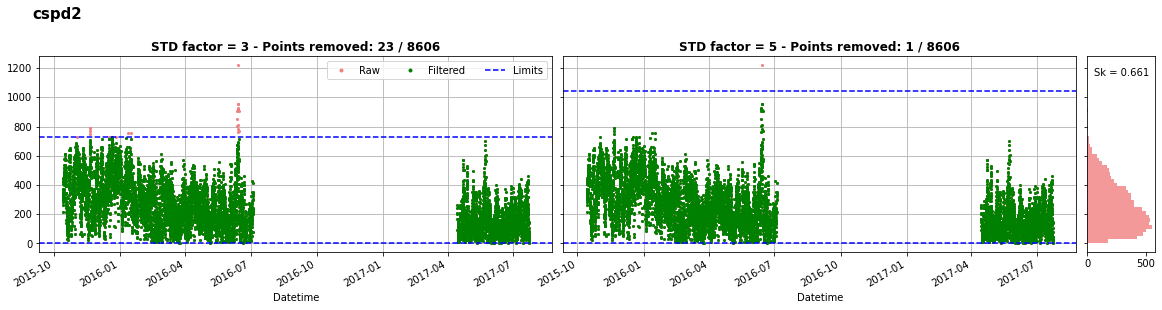

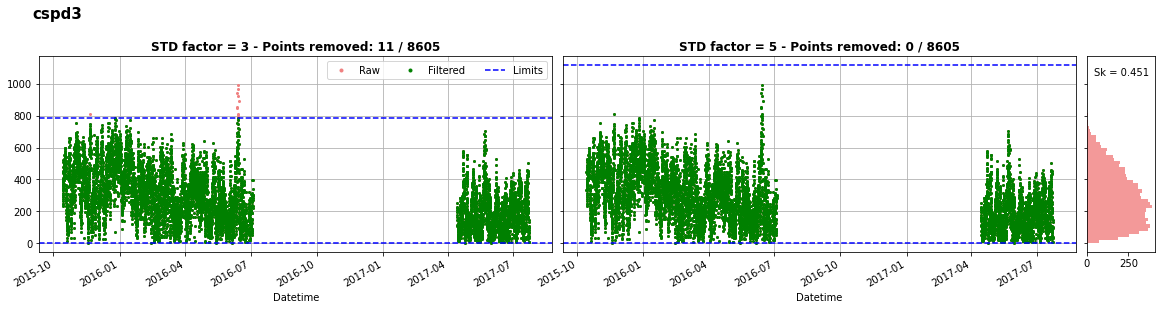

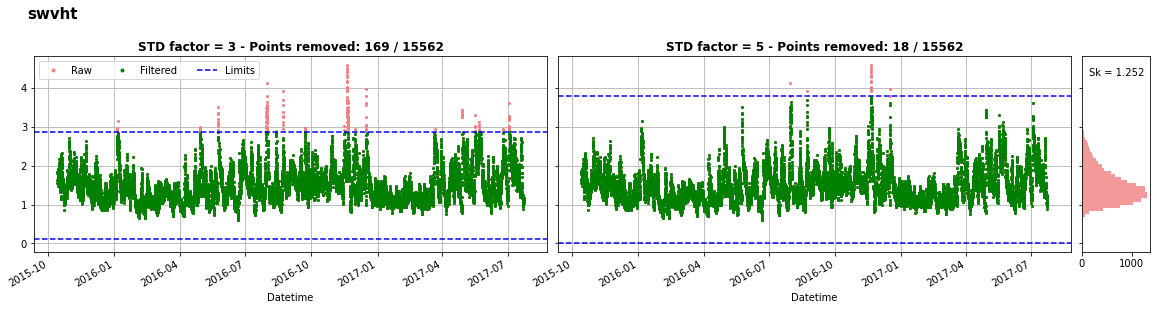

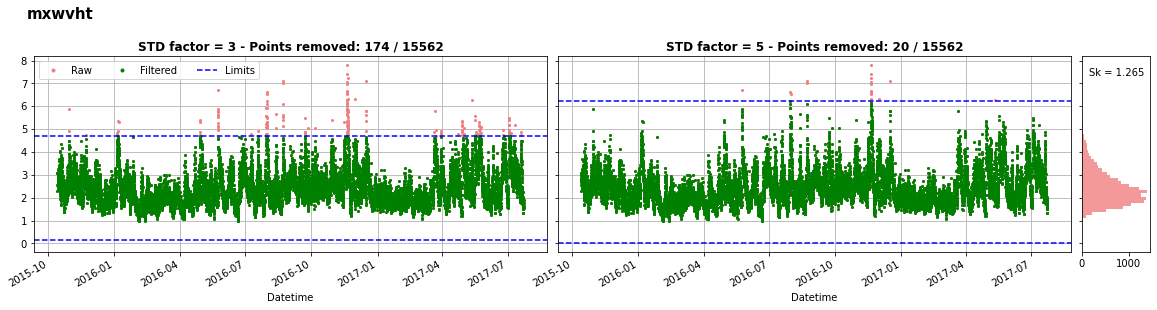

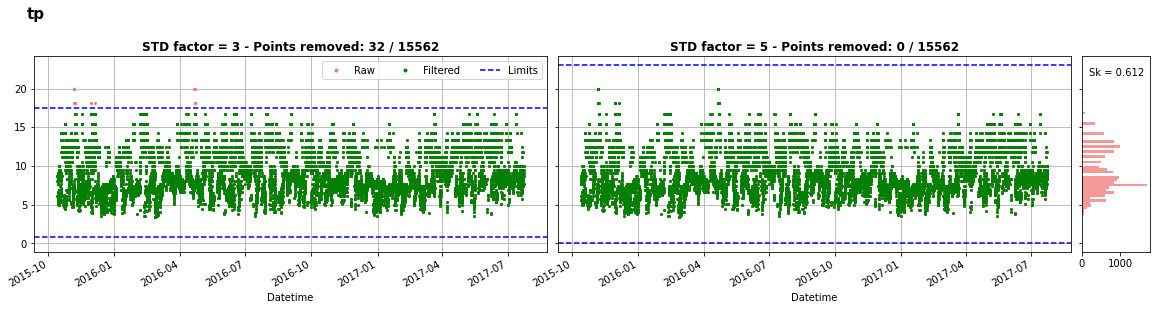

In [15]:
parameters = vitoria.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=vitoria,
                    limits=vitoria_lims,
                    buoy='vitoria',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

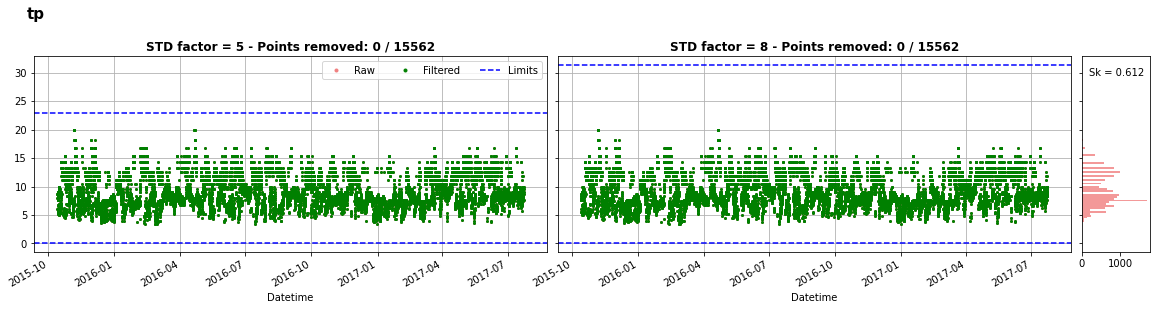

In [42]:
param = 'tp'
plot_comparison(factor1=5, 
                    factor2=8, 
                    data=vitoria,
                    limits=vitoria_lims,
                    buoy='vitoria',
                    parameter=param)
plt.show()

In [43]:
factors = {'wspd1': 5,
            'gust1': 6,
            'wspd2': 5,
            'gust2': 6,
            'atmp': 5,
            'rh': 5,
            'dewpt': 5,
            'pres': 5,
            'sst': 4,
            'srad': 4,
            'cspd1': 5,
            'cspd2': 5,
            'cspd3': 5,
            'swvht': 8,
            'mxwvht': 8,
            'tp': 5}

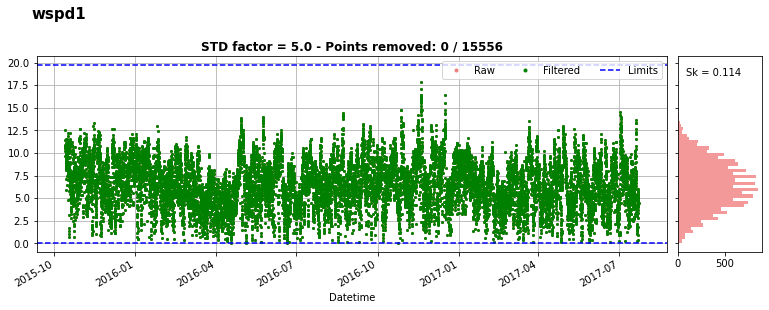

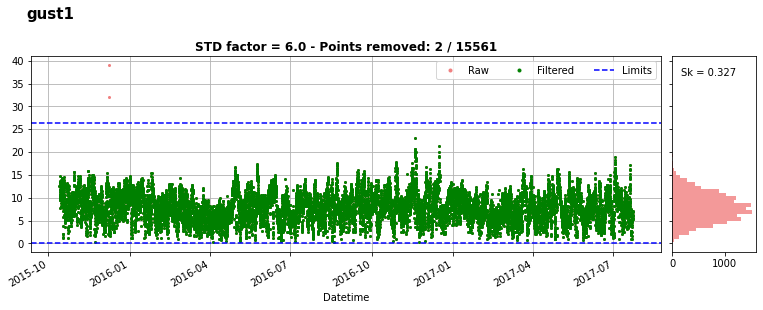

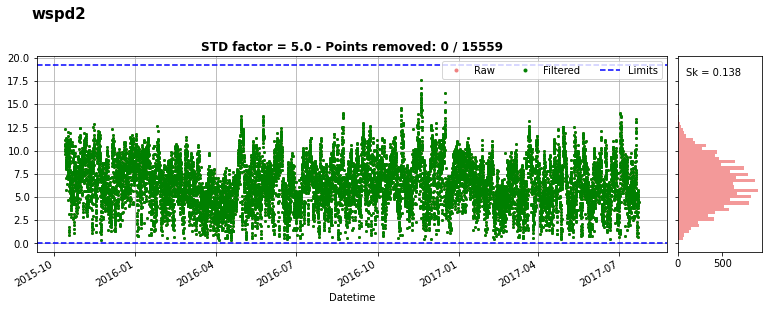

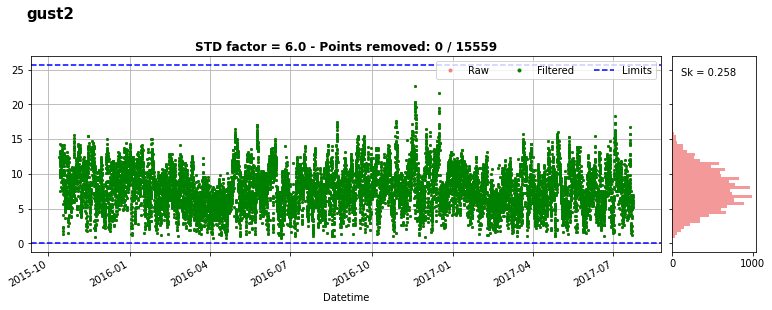

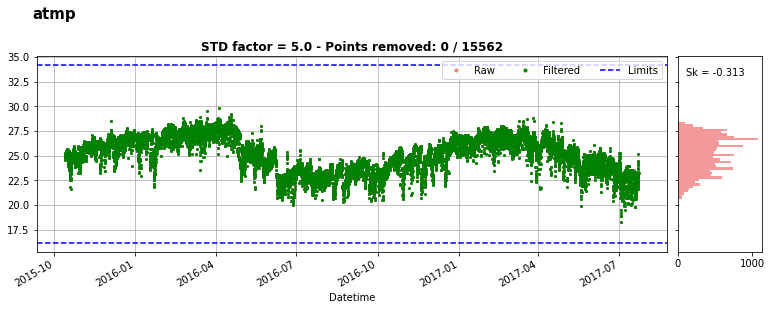

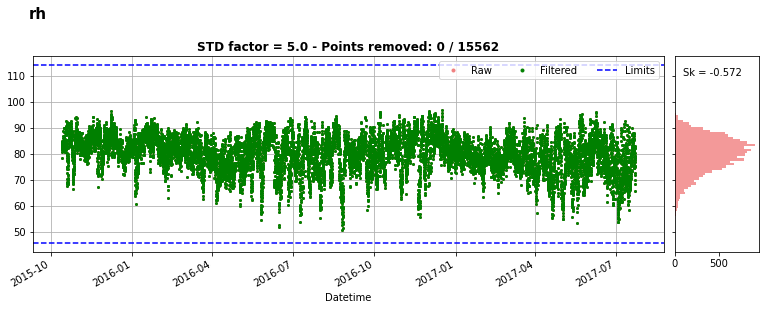

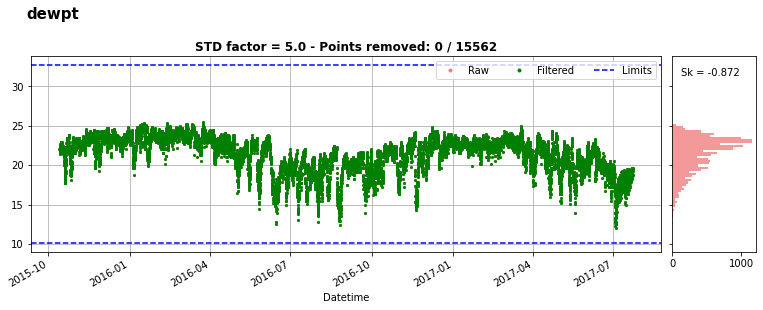

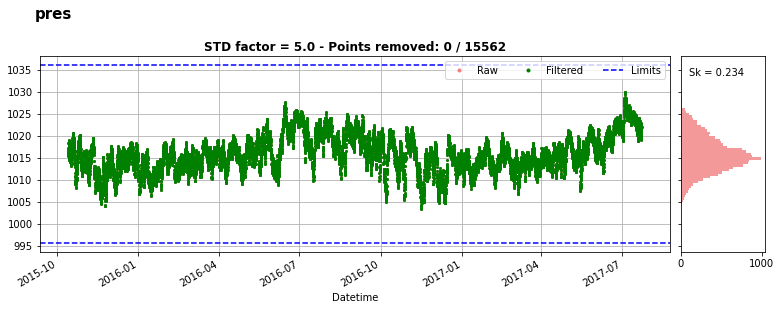

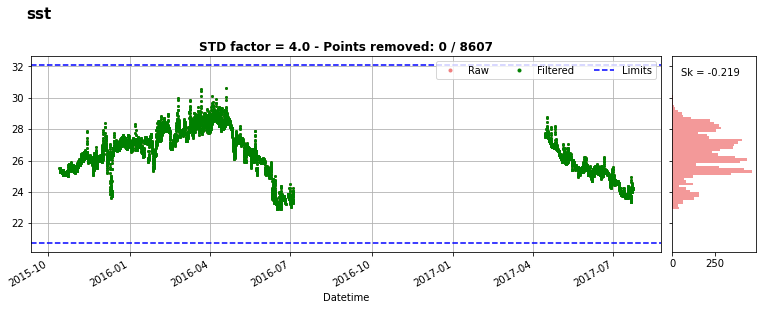

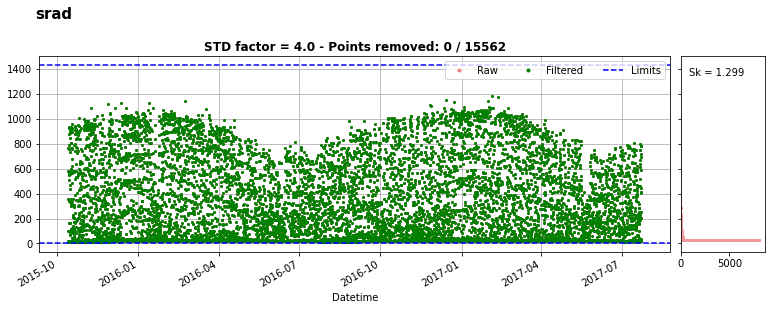

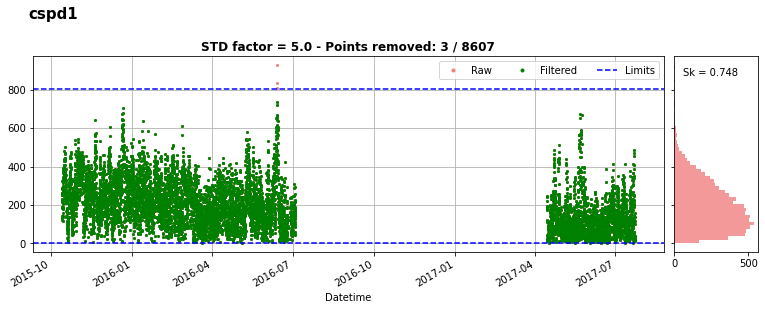

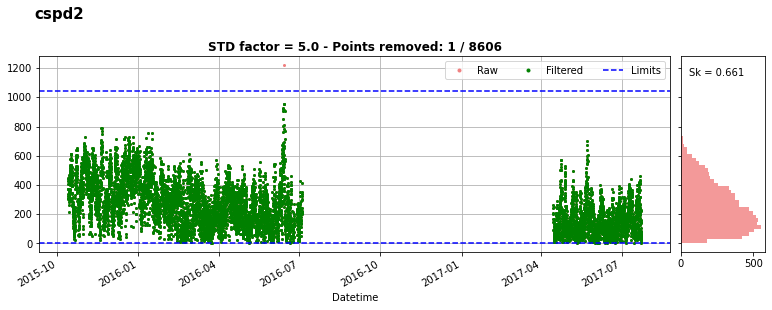

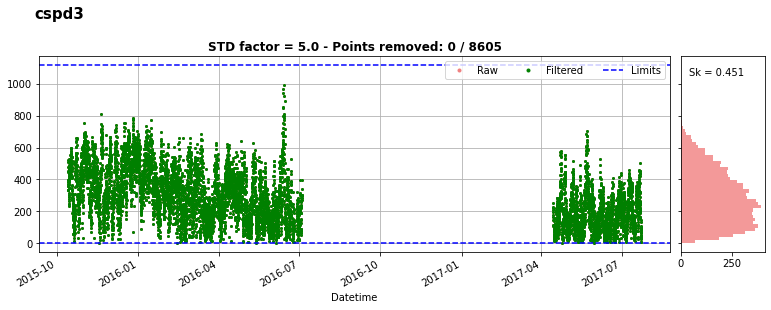

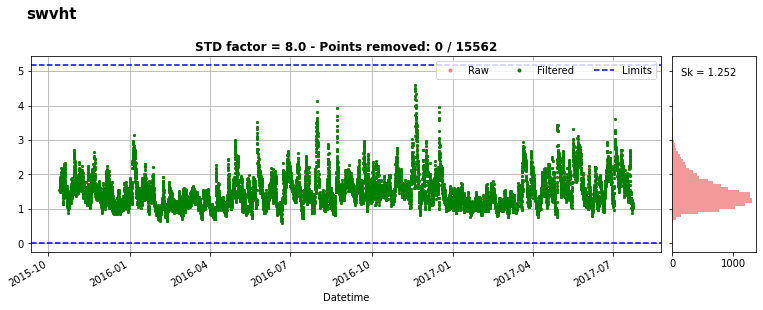

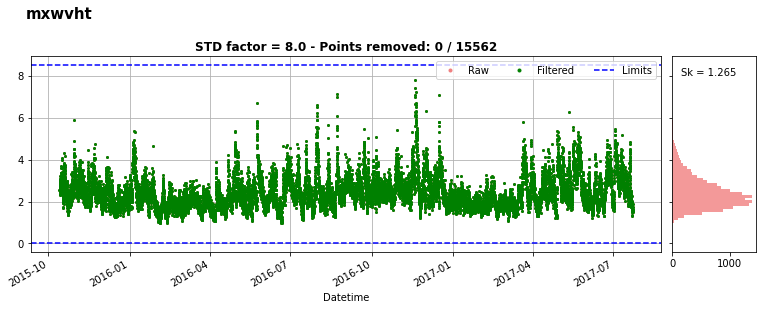

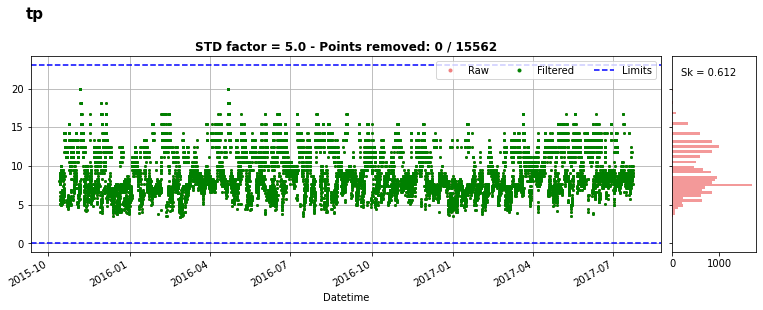

In [44]:
# FILTERING WITH DEFINITIVE FACTORS
vitoria_notdir = vitoria.drop(columns=vitoria.filter(regex='dir|head|spread').columns)
parameters = vitoria_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=vitoria,
                    limits=vitoria_lims,
                    buoy='vitoria',
                    parameter=param)
    plt.show()

In [45]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS FOR SANTOS BUOY

factors = {'wspd1': 5,
            'gust1': 6,
            'wspd2': 5,
            'gust2': 6,
            'atmp': 5,
            'rh': 5,
            'dewpt': 5,
            'pres': 5,
            'sst': 4,
            'srad': 4,
            'cspd1': 5,
            'cspd2': 5,
            'cspd3': 5,
            'swvht': 8,
            'mxwvht': 8,
            'tp': 5}

vitoria_out_lims_df = gen_outlier_lim(data=vitoria,
                                     buoy_name='vitoria',
                                     std_factor=factors).round(1)

In [46]:
vitoria_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,6.5,2.6,5.0,13.2,0.0,19.7
gust1,7.9,3.1,6.0,18.5,0.0,26.4
wspd2,6.4,2.6,5.0,12.8,0.0,19.2
gust2,7.9,3.0,6.0,17.8,0.0,25.6
atmp,25.1,1.8,5.0,9.0,16.1,34.2
rh,79.8,6.8,5.0,34.2,45.5,114.0
dewpt,21.4,2.3,5.0,11.3,10.1,32.7
pres,1015.8,4.0,5.0,20.2,995.6,1036.0
sst,26.4,1.4,4.0,5.7,20.7,32.1


In [47]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS FOR SANTOS BUOY
vitoria_out_lims_dict = manual_outlier_lims(vitoria_out_lims_df, buoy_name='vitoria')

In [48]:
vitoria_out_lims_dict

{'wspd1': [0.0, 19.7],
 'gust1': [0.0, 26.4],
 'wspd2': [0.0, 19.2],
 'gust2': [0.0, 25.6],
 'atmp': [16.1, 34.2],
 'rh': [45.5, 114.0],
 'dewpt': [10.1, 32.7],
 'pres': [995.6, 1036.0],
 'sst': [20.7, 32.1],
 'srad': [0.0, 1430.7],
 'cspd1': [0.0, 806.8],
 'cspd2': [0.0, 1044.0],
 'cspd3': [0.0, 1113.8],
 'swvht': [0.0, 5.2],
 'mxwvht': [0.0, 8.5],
 'tp': [0.0, 23.0]}

In [50]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
vitoria_definitive = filter_data(data=buoys_df_raw,
                    buoy='vitoria',
                    limits=vitoria_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=vitoria_out_lims_dict)

outlier_check done.
